In [ ]:
pip install numpy matplotlib


Lorentz Factor (gamma): 7.09
Doppler Factor (delta): 10.25
Observed Intensity (I): 1.08e-02 arbitrary units
Power of the Jet (P_BZ): 5.48e-41 W
Mass of the Black Hole (M_BH): 2.06e+32 kg


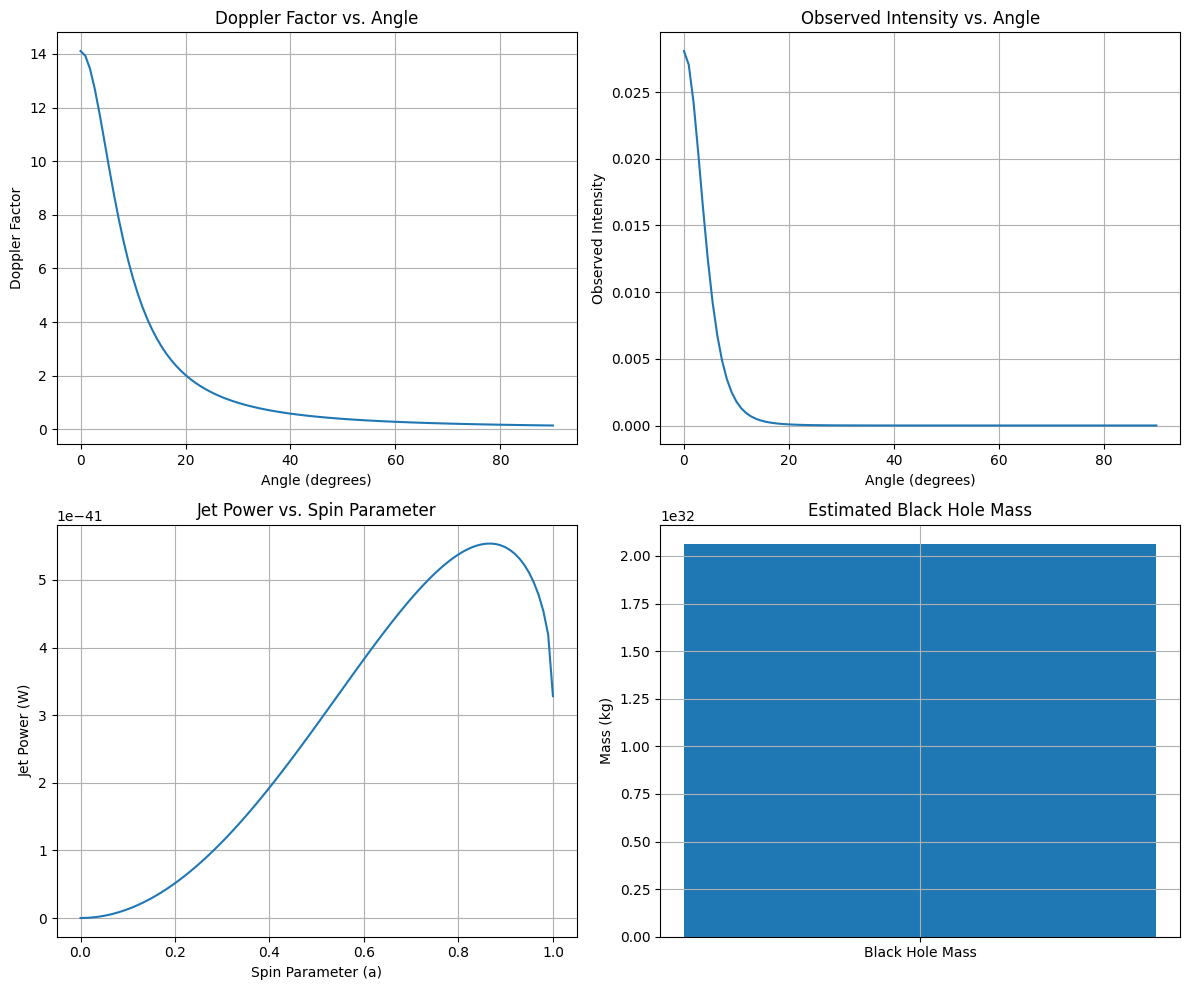

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
beta = 0.99  # v/c
theta_deg = 5  # angle in degrees
I_0 = 1e-5  # intrinsic intensity in arbitrary units

B_p = 1e4  # magnetic field strength in Gauss
M_solar_masses = 1e9  # mass of the black hole in solar masses
a = 0.9  # spin parameter
c = 3e8  # speed of light in m/s
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2

R_BLR = 1e14  # radius of the broad-line region in meters
Delta_V = 5e3  # velocity dispersion in m/s
f = 5.5  # virial factor

# Convert units and constants
M = M_solar_masses * 1.989e30  # mass of the black hole in kg
theta_rad = np.radians(theta_deg)

# Calculate the Lorentz factor
gamma = 1 / np.sqrt(1 - beta**2)

# Calculate the Doppler factor
delta = 1 / (gamma * (1 - beta * np.cos(theta_rad)))

# Calculate the observed intensity
p = 3  # assuming a typical value for continuous jets
I = I_0 * delta**p

# Radius of the event horizon
r_H = (G * M / c**2) * (1 + np.sqrt(1 - a**2))

# Power extracted via Blandford-Znajek mechanism
kappa = 0.05  # typical value for the dimensionless parameter
P_BZ = (kappa / (4 * np.pi)) * (B_p**2 / 2) * r_H**2 * c * (a / M)**2

# Mass of the black hole using the virial method
M_BH = f * (R_BLR * Delta_V**2) / G

# Printing results
print(f"Lorentz Factor (gamma): {gamma:.2f}")
print(f"Doppler Factor (delta): {delta:.2f}")
print(f"Observed Intensity (I): {I:.2e} arbitrary units")
print(f"Power of the Jet (P_BZ): {P_BZ:.2e} W")
print(f"Mass of the Black Hole (M_BH): {M_BH:.2e} kg")

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting Lorentz factor and Doppler factor
theta_range = np.linspace(0, 90, 100)
delta_range = 1 / (gamma * (1 - beta * np.cos(np.radians(theta_range))))
axs[0, 0].plot(theta_range, delta_range)
axs[0, 0].set_title('Doppler Factor vs. Angle')
axs[0, 0].set_xlabel('Angle (degrees)')
axs[0, 0].set_ylabel('Doppler Factor')
axs[0, 0].grid(True)

# Plotting observed intensity vs. angle
I_range = I_0 * delta_range**p
axs[0, 1].plot(theta_range, I_range)
axs[0, 1].set_title('Observed Intensity vs. Angle')
axs[0, 1].set_xlabel('Angle (degrees)')
axs[0, 1].set_ylabel('Observed Intensity')
axs[0, 1].grid(True)

# Plotting power of the jet
a_range = np.linspace(0, 1, 100)
r_H_range = (G * M / c**2) * (1 + np.sqrt(1 - a_range**2))
P_BZ_range = (kappa / (4 * np.pi)) * (B_p**2 / 2) * r_H_range**2 * c * (a_range / M)**2
axs[1, 0].plot(a_range, P_BZ_range)
axs[1, 0].set_title('Jet Power vs. Spin Parameter')
axs[1, 0].set_xlabel('Spin Parameter (a)')
axs[1, 0].set_ylabel('Jet Power (W)')
axs[1, 0].grid(True)

# Plotting mass of the black hole
axs[1, 1].bar(['Black Hole Mass'], [M_BH])
axs[1, 1].set_title('Estimated Black Hole Mass')
axs[1, 1].set_ylabel('Mass (kg)')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
